In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
#Load instruments using new init file
from v0_utils.InitFridge import QT5_init
station = QT5_init(DMM1=True, DMM2=False, DMM3=False, lockin1=False, lockin2=False, mdac=True, yokogawa=False, SGS1=False, 
                   SGS2=False, scope=False, rigol=True, awg_5208=False, magnet=False, alazar=False)

Instrument DMM1 already exists.


C:\ProgramData\Anaconda3\envs\qcodes\lib\site-packages\pyvisa\ctwrapper\functions.py:1649: VisaIOWarning: VI_WARN_NSUP_ATTR_STATE (1073676420): Although the specified state of the attribute is valid, it is not supported by this implementation.
  return library.viSetAttribute(session, attribute, attribute_state)


Connected to: QNL Sydney MDAC (serial:0x32353532353551040037003E, firmware:1.4) in 5.57s
Connected to: Rigol Technologies DG1062Z (serial:DG1ZA195206768, firmware:03.01.12) in 0.06s


Snapshot: Could not update parameter: period on rigol_burst
Snapshot: Could not update parameter: period on rigol_burst


## Measure current noise spectrum with SRS SR760 FFT spectrum analyzer

In [18]:
import visa
from importlib import reload
import time

In [6]:
rm = visa.ResourceManager()
sr760 = rm.open_resource('GPIB0::10::INSTR')

In [7]:
sr760.timeout = 30000

In [51]:
t0 = time.time()
sr760.write(r"SPAN 3\n")
sr760.write(r"MEAS 1,0\n") #Measure trace 1, type 0 = spectrum
sr760.write(r"DISP 1,0\n") #Trace 1, type 0 = log magnitude
sr760.write(r"UNIT 1,1\n") #Trace 1, type 1 = Vrms
sr760.write(r"VOEU 1,0\n") #Trace 1, type 1 -> units V
sr760.write(r"STRF 0\n") #start frequency

fvals = []
for i in range(400):
    fvals.append(float(sr760.query(r"BVAL? 1,{:d}\n".format(i).strip()))) #query the frequency value of the bins
fvals = np.array(fvals)

print('Duration = ', time.time()-t0)

Duration =  7.046483278274536


In [48]:
sr760.write(r"AVGO 0\n")
sr760.write(r"NAVG 50\n")

(11, <StatusCode.success: 0>)

In [52]:
t0 = time.time()
sr760.write(r"ARNG 1") #Turn on auto range

data = sr760.query(r"SPEC? 1\n").strip() #query spectrum values from trace 1
data = np.array([float(d) for d in data.split(',')[:-1]])

print('Duration = ', time.time()-t0)

Duration =  4.204028844833374


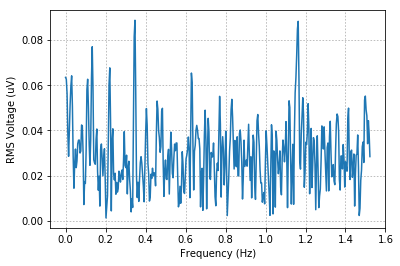

In [53]:
fig, ax = plt.subplots(1,1)
ax.plot(fvals, data * 1e6)
#ax.set_ylim([0,500])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('RMS Voltage (uV)')
ax.grid(dashes=[2,2])